# Computational Electrophysiology Analysis

### 1.  Import modules and packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import MDAnalysis as mda
from numpy.linalg import norm
import math
import pandas as pd
import seaborn as sns
import json
import os
import sys

# For pore analysis
import json
from MDAnalysis.analysis import hole2

print("Modules and packages are imported.")

Modules and packages are imported.


### 2. Define path of input files

In [10]:
# User input parameters
mutation = "WT"
ion = "NA"
repeat = "Repeat2b"
restraints = "CaRestraints"
voltage = "750"

# Give path of input files
path = f"/biggin/b134/bioc1550/Documents/WORK/TPC2/MOLECULAR_DYNAMICS/CONDUCTANCE/{mutation}/Truncated/{ion}/{restraints}/V{voltage}/OpenSF"

# Go to directory
os.chdir(path)

# Print current working directory
print("Current working directory:")
print(os.getcwd())

Current working directory:
/biggin/b134/bioc1550/Documents/WORK/TPC2/MOLECULAR_DYNAMICS/CONDUCTANCE/WT/Truncated/NA/CaRestraints/V750/OpenSF


### 3. Calculate COM of protein, gate and selectivity filter

In [ ]:
# Define universe
u = mda.Universe(f"{path}/{repeat}/conf.gro", f"{path}/{repeat}/traj_fit.xtc")

# u = mda.Universe(f"{path}/{run}/conf.pdb")
# Select atomgroups
protein = u.select_atoms("protein")
gate = u.select_atoms("protein and resid 308 312 690 694 and not name H*")
filt = u.select_atoms("protein and resid 271 272 652 653 654 and not name H*")

print(protein.center_of_mass())
print(gate.center_of_mass())
print(filt.center_of_mass())

y1 = round(gate.center_of_mass()[2], 1)
y2 = round(filt.center_of_mass()[2], 1)

# Define slice of trajectory
start, stop, step = 0, u.trajectory.n_frames, 20

for ts in u.trajectory[start:stop:step]:
    protein_com_z = protein.center_of_mass()[2]
    
aver_protein_com = np.mean(protein_com_z)
print(round(aver_protein_com, 2))

### 4. Calculate Cl, Na and water Oxygen z-axis position in the pore

This script will find all the water molecules, anions and cations that are located within a cylinder that encloses the ion channel pore. The cylinder's axis is parallel to the z-direction and it passes throught the cytosolic gate centre of mass. The cylinder radius is defined by the cutoff value. 

The z-coordinates of all the atoms enclosed within the cylinder at every time-step will be stored in .txt files.

In [12]:
%matplotlib notebook

# User-defined parameters
grofile = f"{path}/{repeat}/conf.gro"
trjfile = f"{path}/{repeat}/traj_fit.xtc"
sel_anion = "name CLA"
sel_cation = "name SOD"
sel_water = "resname TIP3 and name OH2"
sel_gate = "protein and resid 308 312 690 694 and not name H*"
sel_filt = "protein and resid 271 272 652 653 654 and not name H*"

# Create MDA Universe
u = mda.Universe(grofile, trjfile)

# Atomgroup selections
chlor = u.select_atoms(sel_anion)
sod = u.select_atoms(sel_cation)
water = u.select_atoms(sel_water)
gate = u.select_atoms(sel_gate)
filt = u.select_atoms(sel_filt)

# Find centre of pore
y1 = round(gate.center_of_mass()[2], 1)
y2 = round(filt.center_of_mass()[2], 1)
print("Gate centre of mass: ", gate.center_of_mass())
print("Selectivity Filter centre of mass: ", filt.center_of_mass())

rcp = np.array([gate.center_of_mass()[0], gate.center_of_mass()[1]])
z0 = np.array([gate.center_of_mass()[2]])
cutoff = 5.0 
    
# Define empty lists to store data
datacl = []
datasod = []
datawater = []

# Iterate through trajectory frames
start, stop, step = 0, u.trajectory.n_frames, 2
for ts in u.trajectory[start:stop:step]:
    print("Time ", ts.time, " ns")
    for atom in chlor:
        r=np.array([atom.position[0], atom.position[1]])
        dist=norm(rcp-r)  
        if dist <= cutoff:
            datacl.append((ts.time/1000, atom.position[2]))
        #print(ts.time/1000, atom.position[0])
    for atom in sod:
        r=np.array([atom.position[0], atom.position[1]])
        dist=norm(rcp-r)  
        if dist <= cutoff:
            datasod.append((ts.time/1000, atom.position[2]))
        #print(ts.time/1000, atom.position[0])      
    for atom in water:
        r=np.array([atom.position[0], atom.position[1]])
        dist=norm(rcp-r)  
        if dist <= cutoff:
            datawater.append((ts.time/1000, atom.position[2]))
        
# Save in .txt files the z-axis positions of
# anions, cations and water
np.savetxt(f"{path}/{repeat}/permeationcl.txt", np.array(datacl), fmt='%.2f', delimiter=' ', header='Time [ns] Cl z-coord [Angstrom]')
np.savetxt(f"{path}/{repeat}/permeationsod.txt", np.array(datasod), fmt='%.2f', delimiter=' ', header='Time [ns] Na z-coord [Angstrom]')
np.savetxt(f"{path}/{repeat}/permeationwater.txt", np.array(datawater), fmt='%.2f', delimiter=' ', header='Time [ns] OH2 z-coord [Angstrom]')

Gate centre of mass:  [72.6943661  73.3554421  50.90376581]
Selectivity Filter centre of mass:  [72.31910449 72.75930225 72.61224089]
Time  0.0  ns
Time  200.0  ns
Time  400.0  ns
Time  600.0  ns
Time  800.0  ns
Time  1000.0  ns
Time  1200.0  ns
Time  1400.0  ns
Time  1600.0  ns
Time  1800.0  ns
Time  2000.0  ns
Time  2200.0  ns
Time  2400.0  ns
Time  2600.0  ns
Time  2800.0  ns
Time  3000.0  ns
Time  3200.0  ns
Time  3400.0  ns
Time  3600.0  ns
Time  3800.0  ns
Time  4000.0  ns
Time  4200.0  ns
Time  4400.0  ns
Time  4600.0  ns
Time  4800.0  ns
Time  5000.0  ns
Time  5200.0  ns
Time  5400.0  ns
Time  5600.0  ns
Time  5800.0  ns
Time  6000.0  ns
Time  6200.0  ns
Time  6400.0  ns
Time  6600.0  ns
Time  6800.0  ns
Time  7000.0  ns
Time  7200.0  ns
Time  7400.0  ns
Time  7600.0  ns
Time  7800.0  ns
Time  8000.0  ns
Time  8200.0  ns
Time  8400.0  ns
Time  8600.0  ns
Time  8800.0  ns
Time  9000.0  ns
Time  9200.0  ns
Time  9400.0  ns
Time  9600.0  ns
Time  9800.0  ns
Time  10000.0  ns
Time 

Time  90200.0  ns
Time  90400.0  ns
Time  90600.0  ns
Time  90800.0  ns
Time  91000.0  ns
Time  91200.0  ns
Time  91400.0  ns
Time  91600.0  ns
Time  91800.0  ns
Time  92000.0  ns
Time  92200.0  ns
Time  92400.0  ns
Time  92600.0  ns
Time  92800.0  ns
Time  93000.0  ns
Time  93200.0  ns
Time  93400.0  ns
Time  93600.0  ns
Time  93800.0  ns
Time  94000.0  ns
Time  94200.0  ns
Time  94400.0  ns
Time  94600.0  ns
Time  94800.0  ns
Time  95000.0  ns
Time  95200.0  ns
Time  95400.0  ns
Time  95600.0  ns
Time  95800.0  ns
Time  96000.0  ns
Time  96200.0  ns
Time  96400.0  ns
Time  96600.0  ns
Time  96800.0  ns
Time  97000.0  ns
Time  97200.0  ns
Time  97400.0  ns
Time  97600.0  ns
Time  97800.0  ns
Time  98000.0  ns
Time  98200.0  ns
Time  98400.0  ns
Time  98600.0  ns
Time  98800.0  ns
Time  99000.0  ns
Time  99200.0  ns
Time  99400.0  ns
Time  99600.0  ns
Time  99800.0  ns
Time  100000.0  ns
Time  100200.0  ns
Time  100400.0  ns
Time  100600.0  ns
Time  100800.0  ns
Time  101000.0  ns
Time

Time  177000.0  ns
Time  177200.0  ns
Time  177400.0  ns
Time  177600.0  ns
Time  177800.0  ns
Time  178000.0  ns
Time  178200.0  ns
Time  178400.0  ns
Time  178600.0  ns
Time  178800.0  ns
Time  179000.0  ns
Time  179200.0  ns
Time  179400.0  ns
Time  179600.0  ns
Time  179800.0  ns
Time  180000.0  ns
Time  180200.0  ns
Time  180400.0  ns
Time  180600.0  ns
Time  180800.0  ns
Time  181000.0  ns
Time  181200.0  ns
Time  181400.0  ns
Time  181600.0  ns
Time  181800.0  ns
Time  182000.0  ns
Time  182200.0  ns
Time  182400.0  ns
Time  182600.0  ns
Time  182800.0  ns
Time  183000.0  ns
Time  183200.0  ns
Time  183400.0  ns
Time  183600.0  ns
Time  183800.0  ns
Time  184000.0  ns
Time  184200.0  ns
Time  184400.0  ns
Time  184600.0  ns
Time  184800.0  ns
Time  185000.0  ns
Time  185200.0  ns
Time  185400.0  ns
Time  185600.0  ns
Time  185800.0  ns
Time  186000.0  ns
Time  186200.0  ns
Time  186400.0  ns
Time  186600.0  ns
Time  186800.0  ns
Time  187000.0  ns
Time  187200.0  ns
Time  187400

Time  263400.0  ns
Time  263600.0  ns
Time  263800.0  ns
Time  264000.0  ns
Time  264200.0  ns
Time  264400.0  ns
Time  264600.0  ns
Time  264800.0  ns
Time  265000.0  ns
Time  265200.0  ns
Time  265400.0  ns
Time  265600.0  ns
Time  265800.0  ns
Time  266000.0  ns
Time  266200.0  ns
Time  266400.0  ns
Time  266600.0  ns
Time  266800.0  ns
Time  267000.0  ns
Time  267200.0  ns
Time  267400.0  ns
Time  267600.0  ns
Time  267800.0  ns
Time  268000.0  ns
Time  268200.0  ns
Time  268400.0  ns
Time  268600.0  ns
Time  268800.0  ns
Time  269000.0  ns
Time  269200.0  ns
Time  269400.0  ns
Time  269600.0  ns
Time  269800.0  ns
Time  270000.0  ns
Time  270200.0  ns
Time  270400.0  ns
Time  270600.0  ns
Time  270800.0  ns
Time  271000.0  ns
Time  271200.0  ns
Time  271400.0  ns
Time  271600.0  ns
Time  271800.0  ns
Time  272000.0  ns
Time  272200.0  ns
Time  272400.0  ns
Time  272600.0  ns
Time  272800.0  ns
Time  273000.0  ns
Time  273200.0  ns
Time  273400.0  ns
Time  273600.0  ns
Time  273800

Time  349800.0  ns
Time  350000.0  ns
Time  350200.0  ns
Time  350400.0  ns
Time  350600.0  ns
Time  350800.0  ns
Time  351000.0  ns
Time  351200.0  ns
Time  351400.0  ns
Time  351600.0  ns
Time  351800.0  ns
Time  352000.0  ns
Time  352200.0  ns
Time  352400.0  ns
Time  352600.0  ns
Time  352800.0  ns
Time  353000.0  ns
Time  353200.0  ns
Time  353400.0  ns
Time  353600.0  ns
Time  353800.0  ns
Time  354000.0  ns
Time  354200.0  ns
Time  354400.0  ns
Time  354600.0  ns
Time  354800.0  ns
Time  355000.0  ns
Time  355200.0  ns
Time  355400.0  ns
Time  355600.0  ns
Time  355800.0  ns
Time  356000.0  ns
Time  356200.0  ns
Time  356400.0  ns
Time  356600.0  ns
Time  356800.0  ns
Time  357000.0  ns
Time  357200.0  ns
Time  357400.0  ns
Time  357600.0  ns
Time  357800.0  ns
Time  358000.0  ns
Time  358200.0  ns
Time  358400.0  ns
Time  358600.0  ns
Time  358800.0  ns
Time  359000.0  ns
Time  359200.0  ns
Time  359400.0  ns
Time  359600.0  ns
Time  359800.0  ns
Time  360000.0  ns
Time  360200

Time  436200.0  ns
Time  436400.0  ns
Time  436600.0  ns
Time  436800.0  ns
Time  437000.0  ns
Time  437200.0  ns
Time  437400.0  ns
Time  437600.0  ns
Time  437800.0  ns
Time  438000.0  ns
Time  438200.0  ns
Time  438400.0  ns
Time  438600.0  ns
Time  438800.0  ns
Time  439000.0  ns
Time  439200.0  ns
Time  439400.0  ns
Time  439600.0  ns
Time  439800.0  ns
Time  440000.0  ns
Time  440200.0  ns
Time  440400.0  ns
Time  440600.0  ns
Time  440800.0  ns
Time  441000.0  ns
Time  441200.0  ns
Time  441400.0  ns
Time  441600.0  ns
Time  441800.0  ns
Time  442000.0  ns
Time  442200.0  ns
Time  442400.0  ns
Time  442600.0  ns
Time  442800.0  ns
Time  443000.0  ns
Time  443200.0  ns
Time  443400.0  ns
Time  443600.0  ns
Time  443800.0  ns
Time  444000.0  ns
Time  444200.0  ns
Time  444400.0  ns
Time  444600.0  ns
Time  444800.0  ns
Time  445000.0  ns
Time  445200.0  ns
Time  445400.0  ns
Time  445600.0  ns
Time  445800.0  ns
Time  446000.0  ns
Time  446200.0  ns
Time  446400.0  ns
Time  446600

### 5. Plot ion permeation events vs time

This script will read the .txt files generated in the previous step, which contain the z-positions of all the water molecules and ions that are enclosed by the cylinder that defines the channel pore, and will generate a figure that will show the ion permeation events through the channel pore as a function of the simulation time.

In [13]:
# Read channel ion and water coordinate files
data_water=np.loadtxt(f"{path}/{repeat}/permeationwater.txt")
data_anion=np.loadtxt(f"{path}/{repeat}/permeationcl.txt")
# data_cation=np.loadtxt(f"{path}/{run}/permeationcam.txt")
data_cation=np.loadtxt(f"{path}/{repeat}/permeationsod.txt")

# New figure
fig, ax = plt.subplots(1,figsize=(8,3))

# Scatter plots
ax.scatter(np.array(data_water)[:,0], np.array(data_water)[:,1], s=6, color='lightskyblue', alpha=0.2, linewidth=0.0)
ax.scatter(np.array(data_anion)[:,0], np.array(data_anion)[:,1], s=10, color='purple', alpha=1.0, linewidth=0.5, edgecolors='purple')
ax.scatter(np.array(data_cation)[:,0], np.array(data_cation)[:,1], s=10, color='tomato', alpha=0.7, linewidth=0.5, edgecolors='darkred')

# Axes parameters
xmin, xmax = 0, 500
ymin, ymax = 0, 121
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_xticks(np.arange(xmin, xmax+1, 100))
ax.set_yticks(np.arange(ymin, ymax, 20))
ax.set_xlabel('Time [ns]', fontsize='large')
ax.set_ylabel('z [$\AA$]', fontsize='large')
ax.text(0.03, 0.85, f"{repeat}", fontstyle='oblique', fontsize='x-large', color='black', transform=ax.transAxes, ha='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round'))

# Add legend
leg = ["water", "Cl$^{-}$", "Na$^{+}$"]
ax.legend(leg, fancybox=True, shadow=True, bbox_to_anchor=(1.25, 0.95), markerscale=2, fontsize='large')

# Add text and lines
ax.text(0.98, 0.68, "Filter", fontsize='x-large', color='black', transform=ax.transAxes, ha='right', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round'))
ax.text(0.98, 0.3, "Gate", fontsize='x-large', color='black', transform=ax.transAxes, ha='right', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round'))
ax.axhline(y=y1, color='black', linestyle='--', linewidth=2.0)
ax.axhline(y=y2, color='black', linestyle='--',linewidth=2.0)

# Save and show figure
plt.savefig(f"{path}/{repeat}/permeation_water_ions.png", bbox_inches='tight', dpi=600)
plt.show()

<IPython.core.display.Javascript object>

### 6. Channel Pore Profile
a) With HOLE

This script uses the MDAnalysis implementation of the HOLE program to compute and then plot the ion channel pore radius profile. It will also create a VMD surface, for visualisation.

In [ ]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""
  Use the HOLE program to compute the pore radius
"""""""""""""""""""""""""""""""""""""""""""""""""""""

# Give path of HOLE executable
exec_path="/biggin/b134/bioc1550/Software/src/hole2/exe"

# Introduce color dictionaries for the plots
color_dict = {"AllRestraints":"darkred",
        "NoPHSFRestraints":"forestgreen",
        "CaRestraints":"dodgerblue"
             }

color_dict2 = {"NA":"darkred",
        "CA":"darkorchid"
              }

# Give user-defined input parameters
mutation = "WT"
ion="NA"
repeats = ["Repeat1", "Repeat2", "Repeat3"]

# Give names of topology and trajectory files
grofile = "conf_protein.pdb"
trjfile = "traj_fit_protein.xtc"
    
# Atomgroup selections

# Pore-lining protein amino acids
selection = "protein and (resid 257-318 or resid 639-701)"    
# Ca atoms to define centre of channel pore
sel_a = "resid 694 and name CA and chainID A"
sel_b = "resid 694 and name CA and chainID B"

# Trajectory slice to be used for calculation
# start, stop, step = 1500, 2500, 10
print("Input parameters are defined")

# Iterate for all repeats of a simulation
for repeat in repeats:
    # Go to path 
    os.chdir(path)
    # Define universe and atom selection for cpoint coordinate calculation
    u = mda.Universe(f"{path}/{repeat}/{grofile}", f"{path}/{repeat}/{trjfile}")
    start, stop, step = u.trajectory.n_frames-1000, u.trajectory.n_frames, 10
    a = u.select_atoms(sel_a)
    b = u.select_atoms(sel_b)
    print(a.names, a.indices)
    print(b.names, b.indices)
    point = (a.positions + b.positions)/2
    print(point)
    with hole2.HoleAnalysis(u, 
                            executable=f"{exec_path}/hole", 
                            select=selection, 
                            vdwradii_file=None, 
                            output_level = 0,
                            ignore_residues=['CAM', 'SOD', 'CLA', 'TIP', 'EUJ'],
                            cpoint = [np.array(point)[0][0], np.array(point)[0][1], np.array(point)[0][2]],
                            cvect = [0, 0, 1],
                            end_radius = 10.0) as ha:
        ha.run(start, stop, step, verbose=True)
        radius_dict = ha.results.profiles
        for i, k in enumerate(radius_dict.values()):
            radius = np.array(k)
            np.savetxt(f"{path}/{repeat}/pore_radius_{i}.txt", radius)
#         ha.create_vmd_surface(filename=f"{path}/hole_pore.vmd")
        # New figure
        plt.figure(ax1, figsize=(6,3))
        ax = ha.plot_mean_profile(color=color_dict["NoPHSFRestraints"], linewidth='3', ax=ax1)
        # Axes parameters
        xmin, xmax = 35, 103
        ymin, ymax = 0, 10
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        ax.set_xlabel("Pore coordinate $\zeta$ [$\AA$]", fontsize='large')
        ax.set_ylabel("Pore radius $R$ [$\AA$]", fontsize='large')
        plt.tick_params(axis='both', bottom=True, top=True, right=True, left=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize='large', labelrotation=0)
        # Add legend
        leg = [f"{repeat}"]                        
        ax.legend(leg,  loc=2, fancybox=True, shadow=True, fontsize='x-large')
        # Save figure in the same path in .png format
#         plt.savefig(f'{path}/pore_profile_{repeat}.png', bbox_inches='tight', dpi=600)
        plt.show()

b) With CHAP

In [ ]:
mutation = "WT"
# ion = "NA"
run = "RUN1"
# path = f"/biggin/b134/bioc1550/Documents/WORK/TPC2/MOLECULAR_DYNAMICS/CONDUCTANCE/{mutation}/NoFilterRestraints/{ion}/V500/{run}/MD"
path = f"/biggin/b134/bioc1550/Documents/WORK/TPC2/MOLECULAR_DYNAMICS/MUTATIONS/{mutation}/AF_new/{run}/MD"

    
%cd {path}
with open("output.json") as data_file:
    data = json.load(data_file)

    
# begin new plot:
# fig, ax = plt.figure(figsize=(3,3))
fig, ax = plt.subplots(1,figsize=(3,5))

# represent radius profile as black line:
plt.plot(                                                                                                             
    np.array(data["pathwayProfile"]["radiusMean"]),    
    np.array(data["pathwayProfile"]["s"]), 
    "k-")  

plt.fill_betweenx(  
    np.array(data["pathwayProfile"]["s"]),
    np.array(data["pathwayProfile"]["radiusMean"]) - np.array(data["pathwayProfile"]["radiusSd"]),    
    np.array(data["pathwayProfile"]["radiusMean"]) + np.array(data["pathwayProfile"]["radiusSd"]),   
    facecolor = "#000000",                                                      
    alpha = 0.2)

xmin, xmax = 0, 0.6
ymin, ymax = -7, 7
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_xticks(np.arange(xmin, xmax+0.1, 0.1))
ax.set_yticks(np.arange(ymin, ymax+1))
ax.set_ylabel("Pore coordinate $\zeta$ [$\AA$]", fontsize='large')
ax.set_xlabel("Pore radius $R$ [$\AA$]", fontsize='large')

plt.tick_params(axis='both', bottom=True, top=True, right=True, left=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize='large', labelrotation=0)
leg = ["WT"]                        
ax.legend(leg,  loc=2, fancybox=True, shadow=True, fontsize='large')
plt.title(f"{mutation}", fontsize='large')
# save plot to file:
# plt.savefig("radius_profile.png")

# end figure definition:
plt.show()
plt.close("radius_profile")


### 7. Selectivity Filter and Gate key distances

In [ ]:
"""""""""""""""""""""""""""""""""""""""
    Intersubunit distance function
"""""""""""""""""""""""""""""""""""""""

# Function that computes the distance between the two atoms in the same atomgroup
def intersubunit_distance(group):
    r1 = group.positions[0]
    r2 = group.positions[1]
    return round(math.dist(r1, r2), 1)


"""""""""""""""""""""""""""""""""""""""
 Compute distances for starting states
"""""""""""""""""""""""""""""""""""""""

# Find path to input coordinate files
path = "/biggin/b134/bioc1550/Documents/WORK/TPC2/PDB_files"

# Give names of coordinate files
states = ["6nq0.pdb", "6nq1.pdb", "6nq2.pdb"]

# Iterate through all coordinate files
for state in states:
    u = mda.Universe(f"{path}/{state}")

# Select atoms in key residues
# Selectivity Filter
    t271 = u.select_atoms("resid 271 and name O")
    a272 = u.select_atoms("resid 272 and name O")
    v652 = u.select_atoms("resid 652 and name O")
    n653 = u.select_atoms("resid 653 and name OD1")
    n654 = u.select_atoms("resid 654 and name OD1")

    print(state)
    # SF I
    print("SF I")
    print(t271.names, intersubunit_distance(t271))
    print(a272.names, intersubunit_distance(a272))

    # SF II
    print("SF II")
    print(v652.names, intersubunit_distance(v652))
    print(n653.names, intersubunit_distance(n653))
    print(n654.names, intersubunit_distance(n654))

# Gate
    n305 = u.select_atoms("resid 305 and name OD1")
    t308 = u.select_atoms("resid 308 and name CG2")
    y312 = u.select_atoms("resid 312 and name OH")
    l690 = u.select_atoms("resid 690 and name CD1")
    l694 = u.select_atoms("resid 694 and name CB")
    
    print(state)
    # Gate I
    print("Gate I")
    print(n305.names, intersubunit_distance(n305))
    print(t308.names, intersubunit_distance(t308))
    print(y312.names, intersubunit_distance(y312))

    # Gate II
    print("Gate II")
    print(l690.names, intersubunit_distance(l690))
    print(l694.names, intersubunit_distance(l694))

"""""""""""""""""""""""""""""""""""""""
  Compute distances for trajectories
"""""""""""""""""""""""""""""""""""""""

# # Find path to input coordinate files
# path = "/biggin/b134/bioc1550/Documents/WORK/TPC2/MOLECULAR_DYNAMICS/CONDUCTANCE/WT/Truncated/NA/NoFilterRestraints/V500/RUN1"

# # Give names of coordinate files
# grofile = "conf.pdb"
# topolfile = "traj_fit.xtc"
# # Define Universe
# u = mda.Universe(f"{path}/{grofile}", f"{path}/{topolfile}")

# # Select atoms in key residues
# t271 = u.select_atoms("resid 271 and name O")
# a272 = u.select_atoms("resid 272 and name O")
# v652 = u.select_atoms("resid 652 and name O")
# n653 = u.select_atoms("resid 653 and name OD1")
# n654 = u.select_atoms("resid 654 and name OD1")

# t308 = u.select_atoms("resid 308 and name CG2")
# y312 = u.select_atoms("resid 312 and name OH")
# l690 = u.select_atoms("resid 690 and name CD1")
# l694 = u.select_atoms("resid 694 and name CB")


# # Iterate through trajectory
# print(u.trajectory.n_frames)
# start, stop, step = 3000, 4000, 5
# # SF
# t271_dist = []
# a272_dist = []
# v652_dist = []
# n653_dist = []
# n654_dist = []

# # Gate
# t308_dist = []
# y312_dist = []
# l690_dist = []
# l694_dist  = []

# for ts in u.trajectory[start:stop:step]:
#     # SF I
#     t271_dist.append((ts.time/1000, intersubunit_distance(t271)))
#     print(ts.time, intersubunit_distance(t271))
#     a272_dist.append((ts.time/1000, intersubunit_distance(a272)))
#     # SF II
#     v652_dist.append((ts.time/1000, intersubunit_distance(v652)))
#     print(ts.time, intersubunit_distance(v652))
#     n653_dist.append((ts.time/1000, intersubunit_distance(n653)))
#     n654_dist.append((ts.time/1000, intersubunit_distance(n654)))
#     # Gate I
#     t308_dist.append((ts.time/1000, intersubunit_distance(t308)))
#     print(ts.time, intersubunit_distance(t308))
#     y312_dist.append((ts.time/1000, intersubunit_distance(y312)))
#     # Gate II
#     l690_dist.append((ts.time/1000, intersubunit_distance(l690)))
#     l694_dist.append((ts.time/1000, intersubunit_distance(l694)))

# # SF
# np.savetxt(f"{path}/Thr271_dist.txt", np.array(t271_dist))
# np.savetxt(f"{path}/Ala272_dist.txt", np.array(a272_dist))
# np.savetxt(f"{path}/Val652_dist.txt", np.array(v652_dist))
# np.savetxt(f"{path}/Asn653_dist.txt", np.array(n653_dist))
# np.savetxt(f"{path}/Asn654_dist_5ns.txt", np.array(n654_dist))

# # Gate
# np.savetxt(f"{path}/Thr308_dist_5ns.txt", np.array(t308_dist))
# np.savetxt(f"{path}/Tyr312_dist_5ns.txt", np.array(y312_dist))
# np.savetxt(f"{path}/Leu690_dist_5ns.txt", np.array(l690_dist))
# np.savetxt(f"{path}/Leu694_dist_5ns.txt", np.array(l694_dist))

### Plot Gate intersubunit minimum distances

/biggin/b134/bioc1550/Documents/WORK/TPC2/MOLECULAR_DYNAMICS/CONDUCTANCE/WT/Truncated/NA/NoPHSFRestraints/V750
Asn305
10.9
Thr308
10.3
Tyr312
9.8
Leu690
15.3
Leu694
15.5


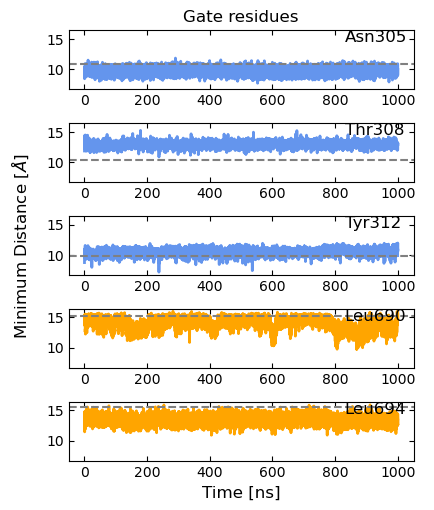

In [4]:
# Find path to input coordinate files
# path = "/biggin/b134/bioc1550/Documents/WORK/TPC2/MOLECULAR_DYNAMICS/CONDUCTANCE/WT/AllRestraints/AF/NA/V500/RUN1"
path = os.getcwd()
print(path)

# repeat = "Repeat1"

residues = ["Asn305", "Thr308", "Tyr312", "Leu690", "Leu694"]

# Open holo state reference distances dictionary
ref_dist={
    "Asn305": 10.9,
    "Thr308": 10.3,
    "Tyr312": 9.8,
    "Leu690": 15.3,
    "Leu694": 15.5
}

# Color dictionary
color_dict={
    "Asn305": "cornflowerblue",
    "Thr308": "cornflowerblue",
    "Tyr312": "cornflowerblue",
    "Leu690": "orange",
    "Leu694": "orange"
}

fig, axs = plt.subplots(5,figsize=(4,5), sharey=True)

i=0
for res in residues:
    print(res)
    data = np.loadtxt(f"{path}/{repeat}/{res}_dist.xvg", comments=["#", "@"])

# xmin=int(np.min(np.array(datacl)[:,0]))
# xmax=int(np.max(np.array(datacl)[:,0]))
# xmin, xmax = 0, 100
# ymax=int(np.max(np.array(datacl)[:,1]))
# ymin, ymax = 0, 10



    axs[i].plot(np.array(data)[:,0]/1000, np.array(data)[:,1]*10, color=color_dict[f"{res}"], linewidth=2)

# ax1.set_xlim([xmin, xmax])
# ax1.set_ylim([ymin, ymax])
# ax1.set_xticks(np.arange(xmin, xmax+1, 50))
# ax1.set_yticks(np.arange(ymin, ymax, 20))
    axs[i].tick_params(axis='both', bottom=True, top=True, left=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize='medium')
#     axs[i].set_ylabel("Distance [$\AA$]", fontsize='large')
    if i==4:
        axs[i].set_xlabel('Time [ns]', fontsize='large')
    axs[i].text(0.8, 0.8, f"{res}", fontweight='normal', fontsize='large', transform=axs[i].transAxes)
    y=ref_dist[f"{res}"]
    print(y)
    axs[i].axhline(y=y, color='grey', linestyle='--')
    i+=1
    fig.tight_layout()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.ylabel("Minimum Distance [$\AA$]", fontsize='large')
plt.title("Gate residues", fontsize='large')
plt.savefig(f"{path}/{repeat}/Gate_distances.png", bbox_inches='tight', dpi=600)
plt.show()

### Plot Filter intersubunit minimum distances

/biggin/b134/bioc1550/Documents/WORK/TPC2/MOLECULAR_DYNAMICS/CONDUCTANCE/WT/Truncated/NA/NoPHSFRestraints/V750
Thr271
8.0
Ala272
7.8
Val652
9.2
Asn653
3.5
Asn654
6.1


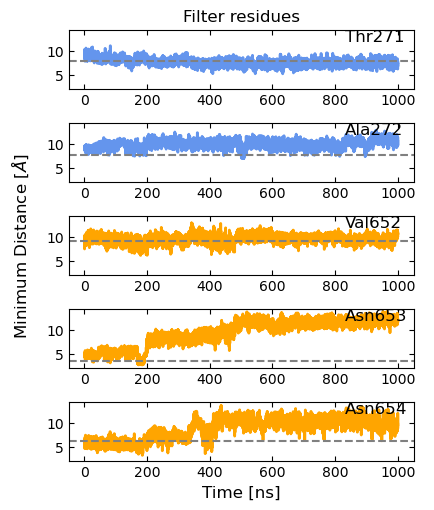

In [5]:
# Find path to input coordinate files
# path = "/biggin/b134/bioc1550/Documents/WORK/TPC2/MOLECULAR_DYNAMICS/CONDUCTANCE/WT/AllRestraints/AF/NA/V500/RUN1"
path = os.getcwd()
print(path)

# repeat = "Repeat1"
residues = ["Thr271", "Ala272", "Val652", "Asn653", "Asn654"]

# Open holo state reference distances dictionary
ref_dist={
    "Thr271": 8.0,
    "Ala272": 7.8,
    "Val652": 9.2,
    "Asn653": 3.5,
    "Asn654": 6.1
}


# Color dictionary
color_dict={
    "Thr271": "cornflowerblue",
    "Ala272": "cornflowerblue",
    "Val652": "orange",
    "Asn653": "orange",
    "Asn654": "orange"
}

fig, axs = plt.subplots(5,figsize=(4,5), sharey=True)

i=0
for res in residues:
    print(res)
    data = np.loadtxt(f"{path}/{repeat}/{res}_dist.xvg", comments=["#", "@"])

# xmin=int(np.min(np.array(datacl)[:,0]))
# xmax=int(np.max(np.array(datacl)[:,0]))
# xmin, xmax = 0, 100
# ymax=int(np.max(np.array(datacl)[:,1]))
# ymin, ymax = 0, 10



    axs[i].plot(np.array(data)[:,0]/1000, np.array(data)[:,1]*10, color=color_dict[f"{res}"], linewidth=2)

# ax1.set_xlim([xmin, xmax])
# ax1.set_ylim([ymin, ymax])
# ax1.set_xticks(np.arange(xmin, xmax+1, 50))
# ax1.set_yticks(np.arange(ymin, ymax, 20))
    axs[i].tick_params(axis='both', bottom=True, top=True, left=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize='medium')
    if i==4:
        axs[i].set_xlabel('Time [ns]', fontsize='large')
    axs[i].text(0.8, 0.8, f"{res}", fontweight='normal', fontsize='large', transform=axs[i].transAxes)
    y=ref_dist[f"{res}"]
    print(y)
    axs[i].axhline(y=y, color='grey', linestyle='--')
    i+=1
    fig.tight_layout()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.ylabel("Minimum Distance [$\AA$]", fontsize='large')
plt.title("Filter residues", fontsize='large')
plt.savefig(f"{path}/{repeat}/Filter_distances.png", bbox_inches='tight', dpi=600)
plt.show()

### 8. Cumulative number of ion permeation events

In [ ]:
# Introduce empty dictionary to store data
events = {}

# Import data files
repeats=["Repeat1"]

for repeat in repeats:
    events[f"{repeat}"]=np.loadtxt(f"{path}/{repeat}/cum_events.xvg", delimiter=",", dtype=float, usecols=(0,1), comments=("#", "@"))

# Begin new plot:
plt.figure("Ion Permeation Events")

# Plot all repeats in one figure
plt.plot(                                                                        
    events["Repeat1"][:,0],   events["Repeat1"][:,1],                                  
    "-", c='forestgreen', linewidth='3', label="Repeat1")  
# plt.plot(                                                                        
#     events["Repeat2"][:,0],   events["Repeat2"][:,1],                                  
#     "-", c='dodgerblue', linewidth='3', label="Repeat2")  
# plt.plot(                                                                        
#     events["Repeat3"][:,0],   events["Repeat3"][:,1],                                  
#     "-", c='orange', linewidth='3', label="Repeat3")  

# Axes parameters
xmin, xmax, xstep = 0, 1001, 200
plt.xlim(xmin, xmax)
plt.ylim(-0.5, 70)
plt.xlabel("Time [ns]", fontsize='large')
plt.ylabel("N$_{events}$", fontsize='large')

# Add legend
plt.legend(loc=2, fancybox=True, shadow=True, fontsize='large')

# Add text
plt.text(1000, 62.5, "13.24 pS", fontweight='normal', fontsize='x-large', color='forestgreen', ha='right')
# plt.text(750, 0.5, "0 pS", fontweight='normal', fontsize='x-large', color='dodgerblue', ha='right')
# plt.text(1000, 0.5, "0 pS", fontweight='normal', fontsize='x-large', color='orange', ha='right')

# fig.tight_layout()
# Save figure as .png image and show:
plt.savefig(f"{path}/events.png", bbox_inches='tight', dpi=600)
plt.show()

### 9. Ion permeation time through SF and Gate

In [ ]:
# Import Data
df1 = pd.read_csv(f"{path}/{repeat}/passing_time.csv")
print(df1)

# Calculate permeation time averages and standard deviations
aver_SFtime = np.mean(np.array(df1)[:,0])
aver_Gatetime = np.mean(np.array(df1)[:,1])
std_SFtime = np.std(np.array(df1)[:,0])
std_Gatetime = np.std(np.array(df1)[:,1])

# Store data in new dataframe
data = {
    "Pore Region": ["SF", "Gate"],
    "Passing Time": [aver_SFtime, aver_Gatetime]
}

df2 = pd.DataFrame(data, index=[0,1])                             
print(df2)

# New figure
fig, axs = plt.subplots(1,figsize=(6,4))

# Barplot
ax=sns.barplot(x='Pore Region', y='Passing Time', data=df2, palette='flare', alpha=0.8)

# Axes parameters
plt.ylim(0, 50)
plt.xlabel("Pore Region", fontsize='large')
plt.ylabel("Passing Time [ns]", fontsize='large')
plt.legend([f"{repeat}"], fontsize='large', fancybox=True, shadow=True, loc=2)

# Save and show figure
plt.savefig(f"{path}/{repeat}/passing_time.png", bbox_inches='tight', dpi=600)
plt.show()

### Improve HOLE script

In [ ]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""
  Use the HOLE program to compute the pore radius
"""""""""""""""""""""""""""""""""""""""""""""""""""""

# Give path of HOLE executable
exec_path="/biggin/b134/bioc1550/Software/src/hole2/exe"

# Give user-defined input parameters
mutation = "WT"
ion="NA"
repeats = ["Repeat1"]

# Give names of topology and trajectory files
grofile = "conf_protein.pdb"
trjfile = "traj_fit_protein.xtc"
    
# Atomgroup selections

# Pore-lining protein amino acids
selection = "protein and (resid 257-318 or resid 639-701)"    
# Ca atoms to define centre of channel pore
sel_a = "resid 694 and name CA and chainID A"
sel_b = "resid 694 and name CA and chainID B"

# Trajectory slice to be used for calculation
# start, stop, step = 1500, 2500, 10
print("Input parameters are defined")

# Iterate for all repeats of a simulation
for repeat in repeats:
    # Go to path 
    os.chdir(path)
    # Define universe and atom selection for cpoint coordinate calculation
    u = mda.Universe(f"{path}/{repeat}/{grofile}", f"{path}/{repeat}/{trjfile}")
    start, stop, step = u.trajectory.n_frames-100, u.trajectory.n_frames, 20
    a = u.select_atoms(sel_a)
    b = u.select_atoms(sel_b)
    print(a.names, a.indices)
    print(b.names, b.indices)
    point = (a.positions + b.positions)/2
    print(point)
    with hole2.HoleAnalysis(u, 
                            executable=f"{exec_path}/hole", 
                            select=selection, 
                            vdwradii_file=None, 
                            output_level = 0,
                            ignore_residues=['CAM', 'SOD', 'CLA', 'TIP', 'EUJ'],
                            cpoint = [np.array(point)[0][0], np.array(point)[0][1], np.array(point)[0][2]],
                            cvect = [0, 0, 1],
                            end_radius = 10.0) as ha:
        ha.run(start, stop, step, verbose=True)
        radius_dict = ha.results.profiles
        for i, k in enumerate(radius_dict.values()):
            radius = np.array(k)
            np.savetxt(f"{path}/{repeat}/pore_radius_{i}.txt", radius)
